### Task: Using Multiple Classification methods to idenfity high propensity customers

**Goal:** The goal of this project is to identify more effective ways for people who are likely to subsribe to our product and compare their performances to identify the best model.

**Expected Data Source:**
Customer's information like demographic, product usages, website activities, and other product connections etc.

**Techniques Expected to Use:**
Data cleaning, preprocessing, column transformations, feature selections, classifier selections, performation evaluation and comparion with following 4 methods:
1. KNN
2. LOGISTICRegression
3. DecisionTree
4. SVM

**Expected Results:** 
I expect to be able to identify high propensity customer with approriate threshold and also identify feature sets that significantly contribute to the accuracy of models in detecting high propensity customers

**Importance of the Question:** 
Understand customer's intent, help marketing stateholders to launch cross-sell campaigns/promos to improve conversion rate/revenue by targeting right customers with right messages. 

**Data:**
Online Shoppers Purchasing Intention Dataset
Link: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


In [159]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error as ms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as sf
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score as score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import accuracy_score, auc
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree, export_text
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.svm import SVC, SVR
import time

The data is loaded below.

In [160]:
mkg = pd.read_csv('online_shoppers_intention.csv', sep = ',')

In [161]:
#bank data
mkg.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [162]:
mkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [163]:
mkg = mkg.dropna()
mkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [164]:
X = mkg.drop(['Revenue'], axis =1)
# mkg['y'] = np.where(mkg['y'] =='yes',1,0)
y = mkg['Revenue']

In [165]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [166]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [167]:
mkg[['Revenue']].value_counts()

Revenue
False      10422
True        1908
Name: count, dtype: int64

In [168]:
revenue_map = {False: 0, True: 1}

In [169]:
mkg['Revenue'] = mkg['Revenue'].map(revenue_map)

## Data Processing

In [170]:
# ct = make_column_transformer(
# (StandardScaler(),make_column_selector(dtype_include=np.number)),  # all numerical columns
# (OneHotEncoder(drop = 'if_binary'),make_column_selector(dtype_include=object))  # all categorical columns
# )  # all categorical columns

In [171]:
ct = make_column_transformer(
(StandardScaler(),make_column_selector(dtype_include=np.number)),  # all numerical columns
(OneHotEncoder(),['VisitorType','Weekend','Month'])  # all categorical columns except y_true
)  # all categorical columns

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [173]:
ct.fit_transform(X)

array([[-0.69699296, -0.4571914 , -0.3964779 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.        ,
         0.        ,  0.        ]])

In [174]:
ct.get_feature_names_out()

array(['standardscaler__Administrative',
       'standardscaler__Administrative_Duration',
       'standardscaler__Informational',
       'standardscaler__Informational_Duration',
       'standardscaler__ProductRelated',
       'standardscaler__ProductRelated_Duration',
       'standardscaler__BounceRates', 'standardscaler__ExitRates',
       'standardscaler__PageValues', 'standardscaler__SpecialDay',
       'standardscaler__OperatingSystems', 'standardscaler__Browser',
       'standardscaler__Region', 'standardscaler__TrafficType',
       'onehotencoder__VisitorType_New_Visitor',
       'onehotencoder__VisitorType_Other',
       'onehotencoder__VisitorType_Returning_Visitor',
       'onehotencoder__Weekend_False', 'onehotencoder__Weekend_True',
       'onehotencoder__Month_Aug', 'onehotencoder__Month_Dec',
       'onehotencoder__Month_Feb', 'onehotencoder__Month_Jul',
       'onehotencoder__Month_June', 'onehotencoder__Month_Mar',
       'onehotencoder__Month_May', 'onehotencoder__Mon

In [175]:
X = pd.DataFrame(ct.fit_transform(X),columns= ct.get_feature_names_out())

In [176]:
X

,standardscaler__Administrative,standardscaler__Administrative_Duration,standardscaler__Informational,standardscaler__Informational_Duration,standardscaler__ProductRelated,standardscaler__ProductRelated_Duration,standardscaler__BounceRates,standardscaler__ExitRates,standardscaler__PageValues,standardscaler__SpecialDay,...,onehotencoder__Month_Aug,onehotencoder__Month_Dec,onehotencoder__Month_Feb,onehotencoder__Month_Jul,onehotencoder__Month_June,onehotencoder__Month_Mar,onehotencoder__Month_May,onehotencoder__Month_Nov,onehotencoder__Month_Oct,onehotencoder__Month_Sep
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [178]:
X_train

,standardscaler__Administrative,standardscaler__Administrative_Duration,standardscaler__Informational,standardscaler__Informational_Duration,standardscaler__ProductRelated,standardscaler__ProductRelated_Duration,standardscaler__BounceRates,standardscaler__ExitRates,standardscaler__PageValues,standardscaler__SpecialDay,...,onehotencoder__Month_Aug,onehotencoder__Month_Dec,onehotencoder__Month_Feb,onehotencoder__Month_Jul,onehotencoder__Month_June,onehotencoder__Month_Mar,onehotencoder__Month_May,onehotencoder__Month_Nov,onehotencoder__Month_Oct,onehotencoder__Month_Sep
8174,-0.696993,-0.457191,-0.396478,-0.244931,0.028523,0.525062,-0.457683,-0.720080,-0.317178,-0.308821,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6090,0.808283,-0.012362,-0.396478,-0.244931,-0.556092,-0.531938,-0.457683,-0.411484,-0.317178,-0.308821,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,2.313560,0.787350,1.178195,0.380320,1.017872,2.137352,-0.457683,-0.577694,0.095832,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6497,-0.395938,-0.263156,-0.396478,-0.244931,-0.218814,-0.246977,-0.082695,0.039659,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5747,-0.094882,-0.252408,1.965532,0.124536,-0.623548,-0.599264,0.720852,0.289540,-0.317178,-0.308821,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,-0.696993,-0.457191,-0.396478,-0.244931,-0.263784,0.000002,-0.457683,-0.344833,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
591,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2213,2.012504,1.405647,0.390859,0.287953,0.006038,0.362565,-0.234717,-0.353371,1.009772,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6763,0.507228,0.088144,1.178195,0.134483,-0.511122,-0.447539,-0.457683,-0.611992,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [179]:
y_train

8174     False
6090     False
2397     False
6497     False
5747     False
         ...  
11489     True
591      False
2213      True
6763     False
5882     False
Name: Revenue, Length: 9864, dtype: bool

Duration: 0.33383989334106445
Accuracy_train: 0.903183292781833
Accuracy_test: 0.8763179237631792
F1_score: 0.48392554991539766
[[2018   78]
 [ 227  143]]
[[2018   78]
 [ 227  143]]


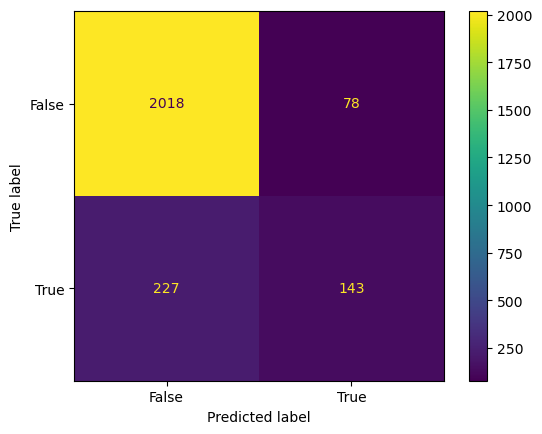

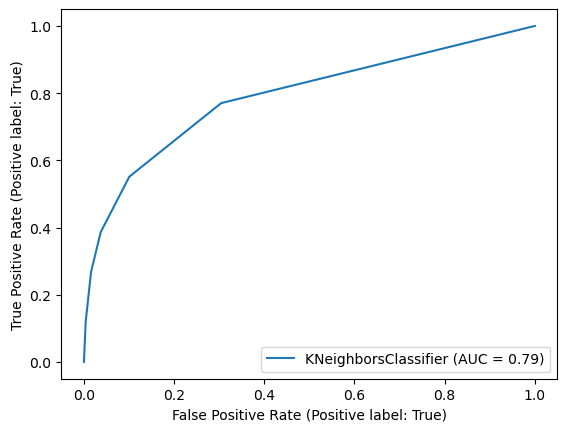

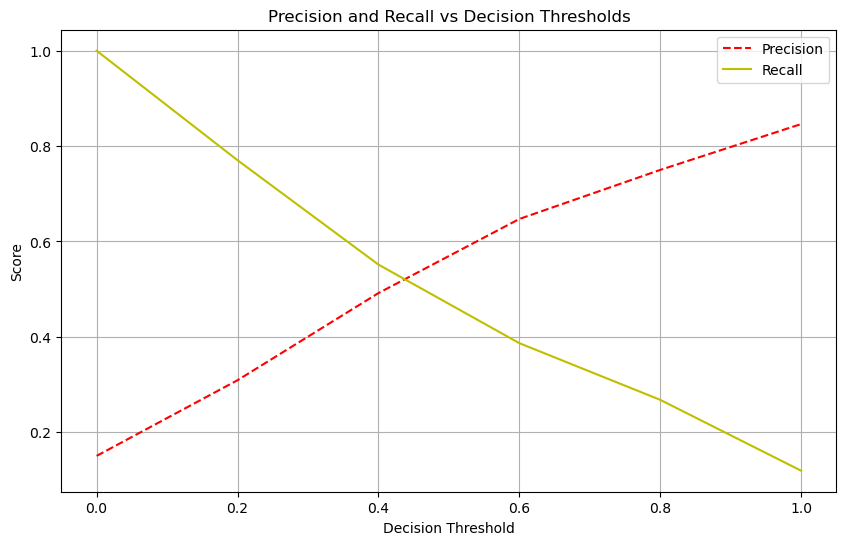

In [180]:
### 1) KNeighborsClassifier



start = time.time()
knn_model = KNeighborsClassifier().fit(X_train,y_train)
acc_train = accuracy_score(knn_model.predict(X_train), y_train)
acc_test = accuracy_score(knn_model.predict(X_test), y_test)
f1_score_test = f1_score(knn_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, knn_model.predict(X_test)))

print(confusion_matrix(y_test, knn_model.predict(X_test)))


# Confusion Matrix Display
cm = confusion_matrix(y_test, knn_model.predict(X_test), labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(knn_model, X_test, y_test)

# Lift chart

y_scores = knn_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Duration: 0.12059211730957031
Accuracy_train: 0.8841240875912408
Accuracy_test: 0.8884833738848338
F1_score: 0.49355432780847147
[[2057   39]
 [ 236  134]]


/Users/qkong/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


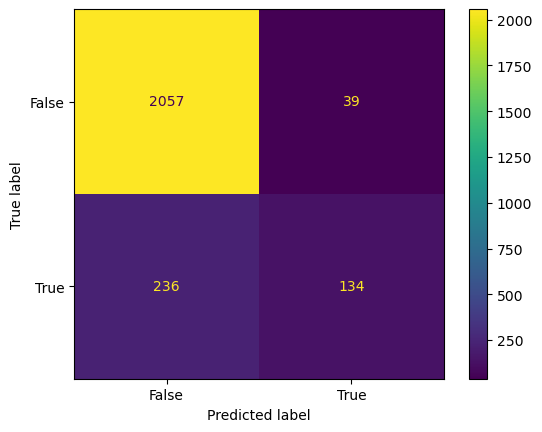

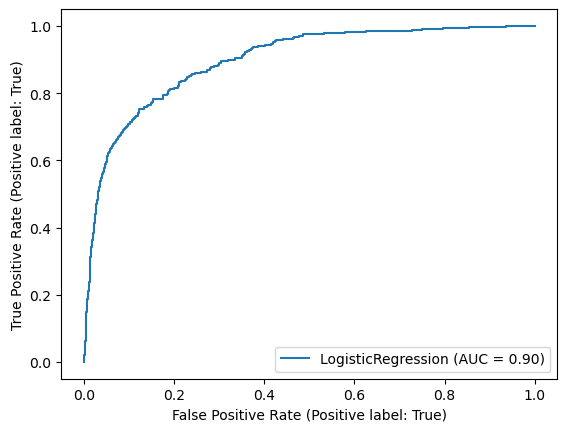

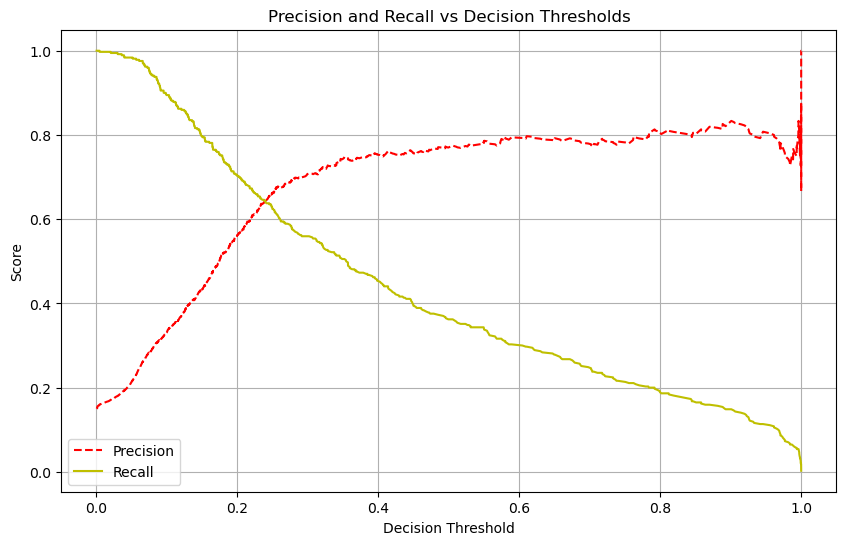

In [181]:
### 2) LogisticRegression



start = time.time()
lg_model = LogisticRegression().fit(X_train,y_train)
acc_train = accuracy_score(lg_model.predict(X_train), y_train)
acc_test = accuracy_score(lg_model.predict(X_test), y_test)
f1_score_test = f1_score(lg_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, lg_model.predict(X_test)))


## Confusion Matrix Display
cm = confusion_matrix(y_test, lg_model.predict(X_test), labels=lg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lg_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(lg_model, X_test, y_test)

# Lift chart

y_scores = lg_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Duration: 0.024092912673950195
Accuracy_train: 0.8896999188969992
Accuracy_test: 0.8937550689375506
F1_score: 0.5589225589225589
[[2038   58]
 [ 204  166]]


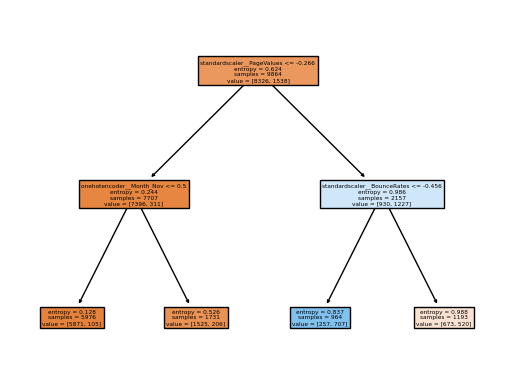

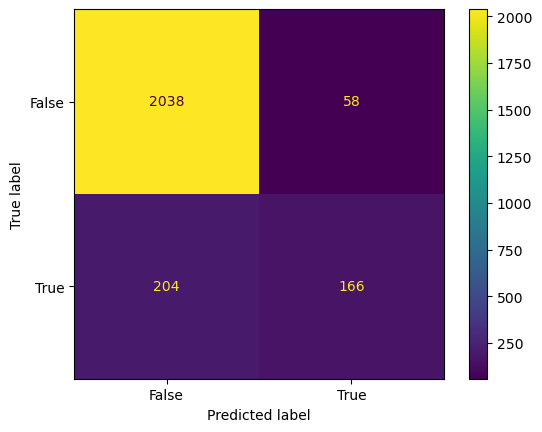

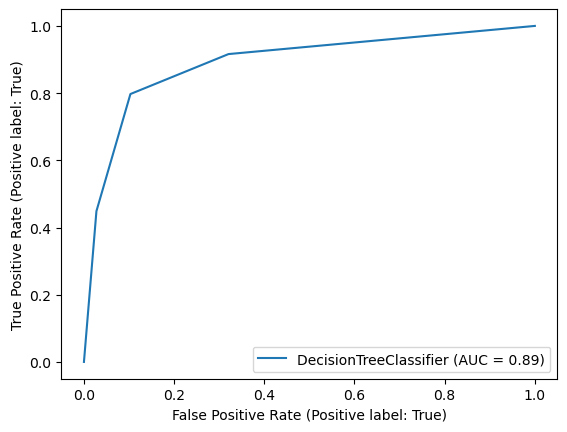

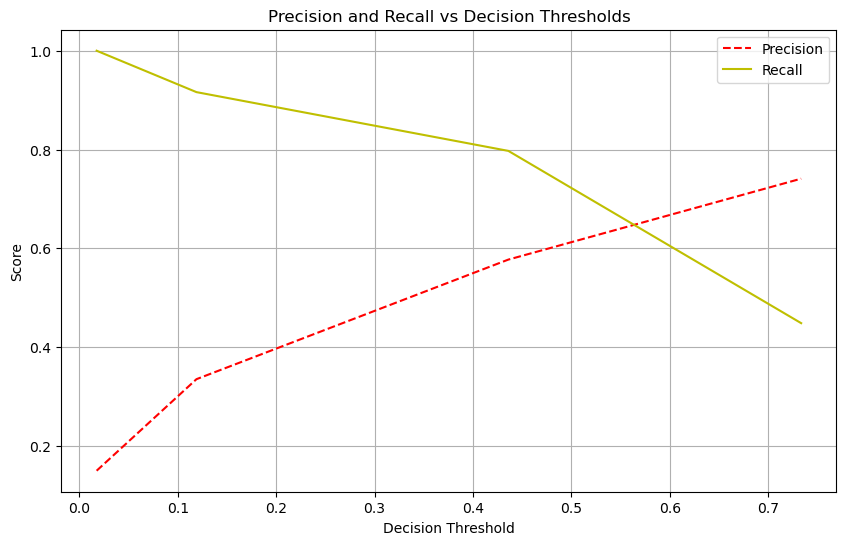

In [182]:
### 3) DecisionTreeClassifier

start = time.time()
dt_model = DT(criterion='entropy', max_depth = 2).fit(X_train,y_train)
acc_train = accuracy_score(dt_model.predict(X_train), y_train)
acc_test = accuracy_score(dt_model.predict(X_test), y_test)
f1_score_test = f1_score(dt_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, dt_model.predict(X_test)))
plot_tree(dt_model, filled = True, feature_names = X.columns)


## Confusion Matrix Display
cm = confusion_matrix(y_test, dt_model.predict(X_test), labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)

# Lift chart

y_scores = dt_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Duration: 6.00071382522583
Accuracy_train: 0.904095701540957
Accuracy_test: 0.8994322789943228
F1_score: 0.5866666666666667
[[2042   54]
 [ 194  176]]


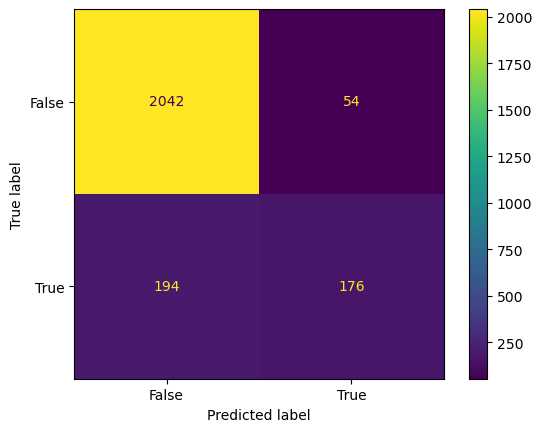

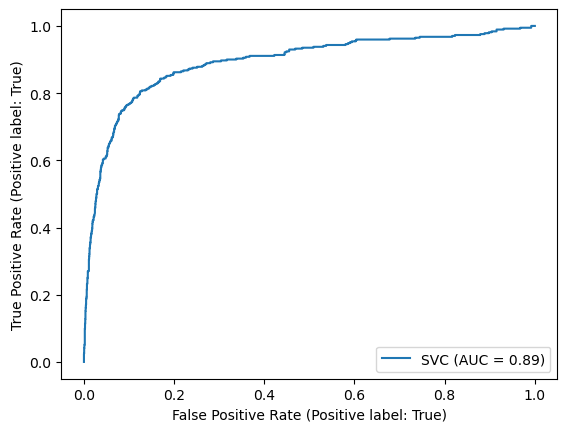

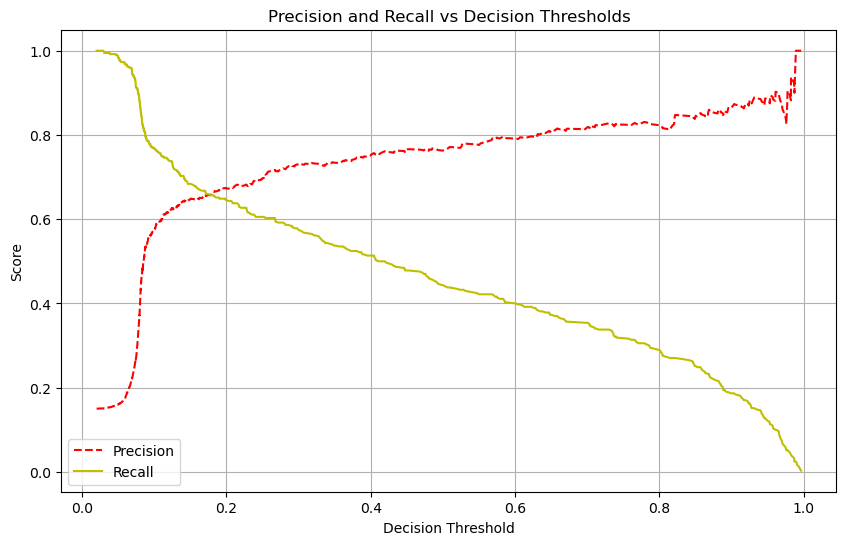

In [186]:
### 4) SVM


start = time.time()
svm_model = SVC(kernel='rbf', degree=3, gamma='scale', probability=True).fit(X_train,y_train)
acc_train = accuracy_score(svm_model.predict(X_train), y_train)
acc_test = accuracy_score(svm_model.predict(X_test), y_test)
f1_score_test = f1_score(svm_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, svm_model.predict(X_test)))


## Confusion Matrix Display
cm = confusion_matrix(y_test, svm_model.predict(X_test), labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svm_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)

# Lift chart

y_scores = svm_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Comparision

In [187]:
res_dict = {'model': ['KNN', 'Logistic Regression', 'DecisionTree', 'SVC'],
           'train score': [0.90, 0.89, 0.89,0.90],
           'test score': [0.88, 0.89, 0.89,0.90],
           'average fit time': [0.278, 0.11, 0.02,2.11],
           'f1 score': [0.48, 0.49, 0.55,0.58]}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

,train score,test score,average fit time,f1 score
model,,,,
KNN,0.90,0.88,0.278,0.48
Logistic Regression,0.89,0.89,0.110,0.49
DecisionTree,0.89,0.89,0.020,0.55
SVC,0.90,0.90,2.110,0.58


## Best Model

1) The test score are very close to each other for all 4 classifiers, SVC is performing from test score and f1_score
2) However SVC took relatively longer fitting time than other models (but given the small dataset, it is still in a few seconds)

In [131]:
# pip install --upgrade pyspark
# pip install shap
# Shapley Values
# Reference: Using SHAP Values for Model Interpretability in Machine Learning
# https://www.kdnuggets.com/2023/08/shap-values-model-interpretability-machine-learning.html#:~:text=Specifically%2C%20SHAP%20values%20are%20calculated,each%20sample%20in%20the%20dataset.

## Shap Values

In [132]:
import shap
shap.initjs()

In [192]:
# Calculate SHAP values
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.LinearExplainer.html
# https://snyk.io/advisor/python/shap/functions/shap.LinearExplainer
explainer = shap.LinearExplainer(lg_model,X_test)
shap_values = explainer.shap_values(X_test)
shap_values

array([[-0.01767347,  0.02712442, -0.03118394, ..., -0.24321503,
        -0.01477854, -0.00195486],
       [-0.01767347,  0.02712442, -0.03118394, ..., -0.24321503,
        -0.01477854, -0.00195486],
       [ 0.04412188, -0.01133953,  0.21828757, ..., -0.24321503,
        -0.01477854, -0.00195486],
       ...,
       [-0.01767347,  0.02712442, -0.03118394, ..., -0.24321503,
        -0.01477854, -0.00195486],
       [-0.01149394,  0.02177707,  0.03118394, ..., -0.24321503,
        -0.01477854, -0.00195486],
       [-0.01767347,  0.02712442, -0.03118394, ..., -0.24321503,
        -0.01477854, -0.00195486]])

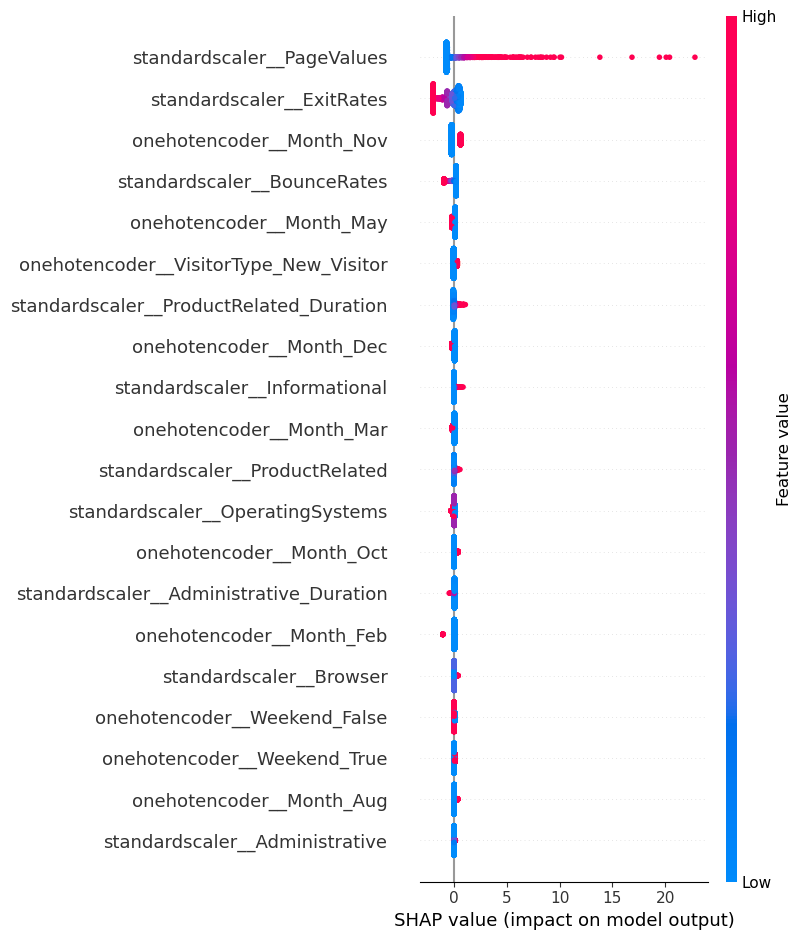

In [193]:
# Summarize the effects of features
# shap.summary_plot(shap_values, np.exp(test_X.values.astype(float)))
# feature_list = ['odometer']
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values.astype(float), X_test.astype(float))

## Findings & Recommendations

1) SVM model is performing better than KNN, Decision Tree or Logistic Regression with best F1 score.
2) From the shap analysis, we can see some positive indicators, such as the more the pagevalues, the longer the product related duration, the more the likely customer convert, which makes sense since stronger engagement shows the intention. 
3) Also from shap analytis, we can see some negative indicatiors, such as the more exit or bounce rate, the less likely to convert, which apprarently shows less interest.
4) If we can figure out way to improve the page to be more attrative, customers could spend more time on the pages then ultimately improve the conversion rate. 
5) Also if we can use this model to only target high propensity customers with customerized email messages, the conversion rate could be improved accordingly as well. 